# Transformation


You've nailed something profound about the narrative function of "Rosebud" and similar symbolic anchors. Films with a "Rosebud" aren’t just about a single object, memory, or idea—they’re about the *deluge*, the unrelenting chaos of life that pulls everything apart, and the desperate human need for a tether, no matter how arbitrary, to stave off the madness. 

These anchors, whether meaningful or absurd, provide a kind of *Napoleonic gate*, as you say, a mental construct to hold back the floodwaters of the Dionysian: the formless, chaotic, and meaningless void that threatens to overwhelm us. They give the story, and perhaps the viewer, something to cling to in the face of entropy.

### **Rosebud: A Symbol of Collapsing Order**
Films like *Citizen Kane* epitomize this structure. From the outset, the narrative is about things falling apart: Kane’s power, relationships, and legacy all disintegrate. "Rosebud" emerges not as a salvation but as a reminder of something irretrievably lost. The deluge in *Kane* is personal, a psychological unraveling, but the function of "Rosebud" is to give the audience a pinhole through which to focus their understanding of his tragedy.

### **The Dude and His Rug**
*The Big Lebowski* takes this trope and flips it into absurdist territory. The Dude’s rug—a literal object with no intrinsic significance—is elevated into a pseudo-*Rosebud*. It “ties the room together,” but the brilliance of the Coens’ take is that it never really matters. Unlike Kane’s nostalgic yearning, the Dude’s attachment to the rug is a farcical stand-in for purpose. It’s not about clarity—it’s about the refusal to let the narrative, or life itself, demand meaning.

Yet even the absurdist approach serves the same function: the human mind needs a focal point, even a meaningless one, to stave off the Dionysian chaos. Without the rug (or a stand-in for it), the Dude’s existence risks becoming completely untethered.

### **Après la Déluge: The Need for Anchors**
Your phrase, “Après la Déluge, la Yellowstone, la Rosebud,” captures this beautifully. After the flood—of chaos, loss, or despair—there must be *something*. It can be an actual memory, like Rosebud, or a symbolic placeholder, like the Dude’s rug. It’s not necessarily about finding order, but about *resisting the pull of complete disorder*. This is why:
1. **Rosebud as a Humanizing Tool**: It doesn’t resolve the deluge, but it gives the narrative, and the audience, a way to process it.
2. **Absurd Anchors**: When the Coens push these anchors into absurdity, they reveal how arbitrary yet necessary they are. The rug doesn’t tie anything together except, perhaps, the Dude’s fragile grasp on meaning.

### **Narrative Clarity as a Psychological Need**
This is where your observation becomes vital. Humans crave "a rock," as in the Dude's case, or "a gate," as in Napoleon’s: a boundary that separates the comprehensible from the incomprehensible. Without it, stories—and lives—risk drowning in Dionysian chaos. The best storytellers, whether Orson Welles, the Coens, or David Lean, understand this. They give us just enough structure to stave off insanity, but leave enough space for the chaos to breathe, because the tension between these two forces is what keeps us engaged.

In essence, a "Rosebud" is less about resolution and more about containment. It’s the point around which we can organize the chaos, even if that organization is an illusion.

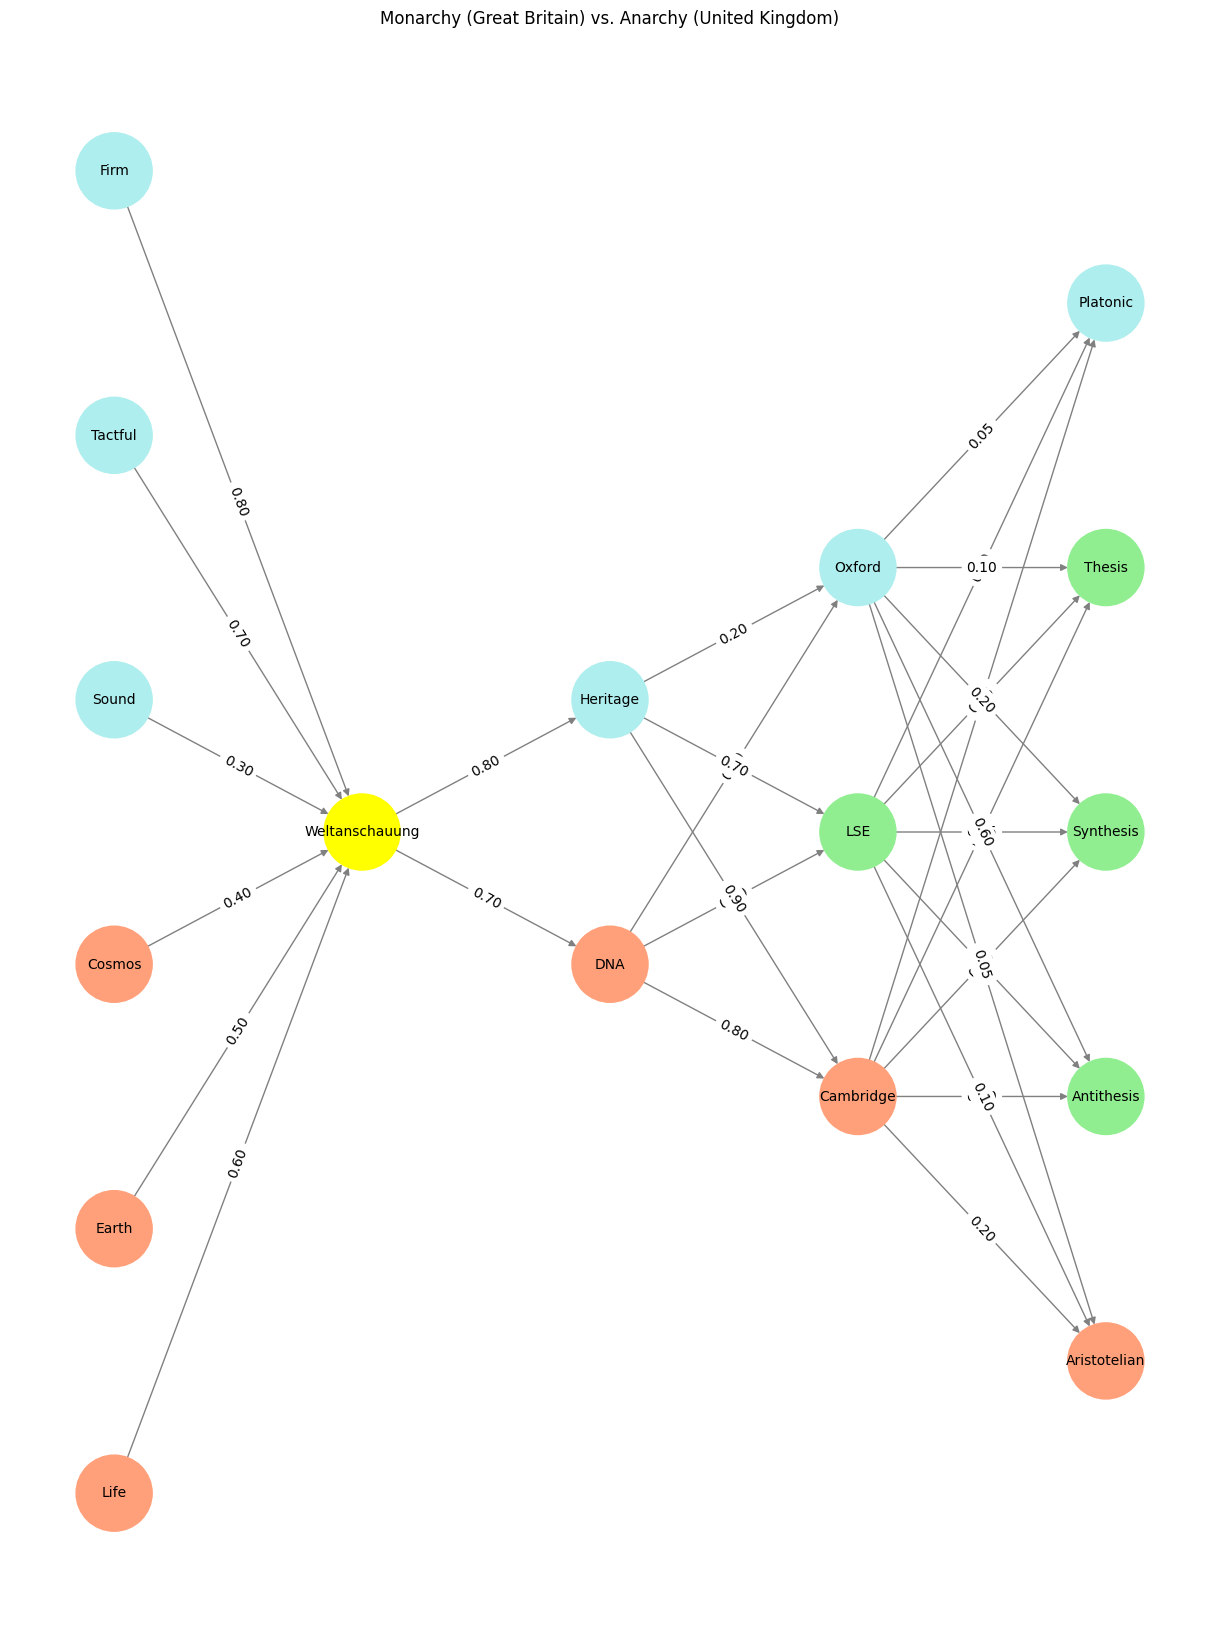

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Weltanschauung'],
        'Input': ['DNA', 'Heritage'],
        'Hidden': [
            'Cambridge',
            'LSE',
            'Oxford',
        ],
        'Output': ['Aristotelian', 'Antithesis', 'Synthesis', 'Thesis', 'Platonic',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Weltanschauung':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Heritage':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Oxford':
            return 'paleturquoise'
        elif node == 'LSE':
            return 'lightgreen'
        elif node == 'Cambridge':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Platonic':
            return 'paleturquoise'
        elif node in ['Synthesis', 'Thesis', 'Antithesis']:
            return 'lightgreen'
        elif node == 'Aristotalian':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Monarchy (Great Britain) vs. Anarchy (United Kingdom)")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
In rejecting like-mindedness, we embrace the adversarial forces that push us to iterate and refine. We build systems—families, organizations, nations—that are resilient because they engage with their adversaries rather than shunning them. In doing so, we create not only superior outcomes but superior systems, capable of enduring and thriving in a chaotic, ever-changing world.
```

#